## フィッシャーのアヤメ
「フィッシャーのアヤメ」という機械学習やデータ分析の世界で有名なデータセットを使い、基本的なデータの扱い方を学んでいきます。


これはカナダのガスペ半島のある牧草地で同じ日に採取された以下の3種類のアヤメ、合計150本のデータです。

setosa、virgiclor、virginicaはここで 目的変数 や ラベル と呼ばれるものに当たります。


1本ごとにsepal_length（がく片の長さ）, sepal_width（がく片の幅）, petal_length（花弁の長さ）, petal_width（花弁の幅）の4種類の情報が記録されています。この4種類を 特徴量 と呼びます。

### 【問題1】データの取得
以下のドキュメントを参考にしながら、irisデータセット読み込みましょう。

[sklearn.datasets.load_iris — scikit-learn 0.20.2 documentation](https://scikit-learn.org/stable/modules/generated/sklearn.datasets.load_iris.html)

データが読み込めたら、説明変数を下のようなPandasのDataFrame型変数Xに格納してください。列の名前も以下を参考にしてください。

[pandas.DataFrame — pandas 0.24.2 documentation](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.html)

In [1]:
from sklearn.datasets import load_iris
import pandas as pd

data = load_iris()
print(type(data))

X = pd.DataFrame(data=data.data, columns=['sepal_length', 'sepal_width', 'petal_length', 'petal_width'])
print(type(X))
X.head(10)

<class 'sklearn.utils.Bunch'>
<class 'pandas.core.frame.DataFrame'>


,sepal_length,sepal_width,petal_length,petal_width
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
5,5.4,3.9,1.7,0.4
6,4.6,3.4,1.4,0.3
7,5.0,3.4,1.5,0.2
8,4.4,2.9,1.4,0.2
9,4.9,3.1,1.5,0.1


In [2]:
y = pd.DataFrame(data=data.target, columns=['Species'])
y.head(10)

,Species
0,0
1,0
2,0
3,0
4,0
5,0
6,0
7,0
8,0
9,0


### 【問題2】データの結合
問題1で準備したX,yを結合させたDataFrame型変数dfを作成してください。結合することで扱いやすくなります。これ以降はこのdfを使っていきます。

In [3]:
df = pd.concat([X, y], axis=1)
#df = df.fillna(0)
df.head()

,sepal_length,sepal_width,petal_length,petal_width,Species
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


### 【問題3】データの確認
今回扱うデータがどのようなものなのかを確認します。以下の4つを行ってください。


先頭から4番目までのサンプルを表示させ、各特徴量がどういったものかを見る。（数値データか文字データかなど）
ラベルごとのサンプル数の合計を出力する。
特徴量に欠損値があるかを確認する。
特徴量の平均値と標準偏差、四分位数を一度に表示させる。

DataFrameのメソッドである.head(),.info(),.describe(),.isnull(),.sum()や、Seriesのメソッドである.value_countsなどを使ってみましょう。

In [4]:
# 先頭から4番目までのサンプルを表示
df.head(4)

,sepal_length,sepal_width,petal_length,petal_width,Species
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0


In [5]:
# 特徴量に欠損値があるかを確認
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   Species       150 non-null    int64  
dtypes: float64(4), int64(1)
memory usage: 6.0 KB


In [6]:
# ラベルごとのサンプル数の合計を出力
# 特徴量の平均値と標準偏差、四分位数を一度に表示
df.describe()

,sepal_length,sepal_width,petal_length,petal_width,Species
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333,1.000000
std,0.828066,0.435866,1.765298,0.762238,0.819232
min,4.300000,2.000000,1.000000,0.100000,0.000000
25%,5.100000,2.800000,1.600000,0.300000,0.000000
50%,5.800000,3.000000,4.350000,1.300000,1.000000
75%,6.400000,3.300000,5.100000,1.800000,2.000000
max,7.900000,4.400000,6.900000,2.500000,2.000000


In [7]:
df.isnull()

,sepal_length,sepal_width,petal_length,petal_width,Species
0,False,False,False,False,False
1,False,False,False,False,False
2,False,False,False,False,False
3,False,False,False,False,False
4,False,False,False,False,False
...,...,...,...,...,...
145,False,False,False,False,False
146,False,False,False,False,False
147,False,False,False,False,False
148,False,False,False,False,False


In [8]:
df.sum()

sepal_length    876.5
sepal_width     458.6
petal_length    563.7
petal_width     179.9
Species         150.0
dtype: float64

In [9]:
print(type(df["sepal_length"]))
df["sepal_length"].value_counts

<class 'pandas.core.series.Series'>


<bound method IndexOpsMixin.value_counts of 0      5.1
1      4.9
2      4.7
3      4.6
4      5.0
      ... 
145    6.7
146    6.3
147    6.5
148    6.2
149    5.9
Name: sepal_length, Length: 150, dtype: float64>

### 【問題4】irisデータセット自体の調査
ページのはじめで「カナダのガスペ半島のある牧草地で」と書きましたが、データセット自体についてもう少し調査しておきましょう。データセットを見る上で、そのデータセット自体について知っておくことも大切です。

In [10]:
print(data.DESCR)

.. _iris_dataset:

Iris plants dataset
--------------------

**Data Set Characteristics:**

    :Number of Instances: 150 (50 in each of three classes)
    :Number of Attributes: 4 numeric, predictive attributes and the class
    :Attribute Information:
        - sepal length in cm
        - sepal width in cm
        - petal length in cm
        - petal width in cm
        - class:
                - Iris-Setosa
                - Iris-Versicolour
                - Iris-Virginica
                
    :Summary Statistics:

    ============== ==== ==== ======= ===== ====================
                    Min  Max   Mean    SD   Class Correlation
    ============== ==== ==== ======= ===== ====================
    sepal length:   4.3  7.9   5.84   0.83    0.7826
    sepal width:    2.0  4.4   3.05   0.43   -0.4194
    petal length:   1.0  6.9   3.76   1.76    0.9490  (high!)
    petal width:    0.1  2.5   1.20   0.76    0.9565  (high!)
    ============== ==== ==== ======= ===== ===========

パターン認識の領域ではよく知られているデータセット。Fisherさんの論文はこの領域でよく参照されるほど古典的なものであるらしい。

### 【問題5】必要なデータを抽出
DataFrameから必要なデータを抽出する方法を確認していきます。以下を行ってください。


- sepal_widthの列を３つの異なる方法で抽出する
- 50番目から99番目までのデータを抽出する
- petal_lengthの列の50番目から99番目までのデータを抽出する
- petal_widthの値が0.2のデータを抽出する

.locや.ilocを使うことになります。この２つはどう違うのかについて説明してください。

In [11]:
# sepal_widthの列を３つの異なる方法で抽出する
print(df['sepal_width'])
print(df.sepal_width)
print(df.iloc[:, 1])
print(df.loc[:, 'sepal_width'])

0      3.5
1      3.0
2      3.2
3      3.1
4      3.6
      ... 
145    3.0
146    2.5
147    3.0
148    3.4
149    3.0
Name: sepal_width, Length: 150, dtype: float64
0      3.5
1      3.0
2      3.2
3      3.1
4      3.6
      ... 
145    3.0
146    2.5
147    3.0
148    3.4
149    3.0
Name: sepal_width, Length: 150, dtype: float64
0      3.5
1      3.0
2      3.2
3      3.1
4      3.6
      ... 
145    3.0
146    2.5
147    3.0
148    3.4
149    3.0
Name: sepal_width, Length: 150, dtype: float64
0      3.5
1      3.0
2      3.2
3      3.1
4      3.6
      ... 
145    3.0
146    2.5
147    3.0
148    3.4
149    3.0
Name: sepal_width, Length: 150, dtype: float64


In [12]:
# 50番目から99番目までのデータを抽出する
print(df.iloc[50:100, :])

    sepal_length  sepal_width  petal_length  petal_width  Species
50           7.0          3.2           4.7          1.4        1
51           6.4          3.2           4.5          1.5        1
52           6.9          3.1           4.9          1.5        1
53           5.5          2.3           4.0          1.3        1
54           6.5          2.8           4.6          1.5        1
55           5.7          2.8           4.5          1.3        1
56           6.3          3.3           4.7          1.6        1
57           4.9          2.4           3.3          1.0        1
58           6.6          2.9           4.6          1.3        1
59           5.2          2.7           3.9          1.4        1
60           5.0          2.0           3.5          1.0        1
61           5.9          3.0           4.2          1.5        1
62           6.0          2.2           4.0          1.0        1
63           6.1          2.9           4.7          1.4        1
64        

In [13]:
# petal_lengthの列の50番目から99番目までのデータを抽出する
df['petal_length'][50:100]

50    4.7
51    4.5
52    4.9
53    4.0
54    4.6
55    4.5
56    4.7
57    3.3
58    4.6
59    3.9
60    3.5
61    4.2
62    4.0
63    4.7
64    3.6
65    4.4
66    4.5
67    4.1
68    4.5
69    3.9
70    4.8
71    4.0
72    4.9
73    4.7
74    4.3
75    4.4
76    4.8
77    5.0
78    4.5
79    3.5
80    3.8
81    3.7
82    3.9
83    5.1
84    4.5
85    4.5
86    4.7
87    4.4
88    4.1
89    4.0
90    4.4
91    4.6
92    4.0
93    3.3
94    4.2
95    4.2
96    4.2
97    4.3
98    3.0
99    4.1
Name: petal_length, dtype: float64

In [14]:
# petal_widthの値が0.2のデータを抽出する
df[df['petal_width'] ==0.2]

,sepal_length,sepal_width,petal_length,petal_width,Species
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0
7,5.0,3.4,1.5,0.2,0
8,4.4,2.9,1.4,0.2,0
10,5.4,3.7,1.5,0.2,0
11,4.8,3.4,1.6,0.2,0
14,5.8,4.0,1.2,0.2,0


#### .locや.ilocの違い
どちらも引数にリストを指定することでデータを取り出すメソッドである。
- 引数に「キー文字列のリスト」を指定するのがiloc
- 引数に「列番号のリスト」を指定するのがloc

### 【問題6】図の作成
データは可視化して確認することが大切です。次の3つを行ってください。作図のライブラリはMatplotlibの他seabornもよく使われます。

- ラベルごとのサンプル数を円グラフにする（パーセンテージまで表示する）
- 特徴量を一つずつ選び、箱ひげ図を使ってラベルごとのデータの分布を可視化する
- 特徴量を一つずつ選び、バイオリン図を使ってラベルごとのデータの分布を可視化する

箱ひげ図とバイオリン図は似た図を表示します。これらはどう違い、それぞれどのような利点があるのかについて説明してください。

In [15]:
import matplotlib.pyplot as plt
import seaborn as sns

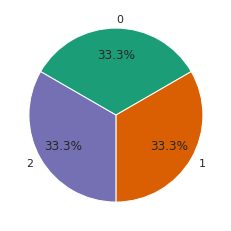

In [16]:
# ラベルごとのサンプル数を円グラフにする（パーセンテージまで表示する）
label = [0, 1, 2]
value = df['Species'].value_counts()

# seabornはmatplotlibの補完的な位置づけのライブラリ
sns.set()
sns.set_style('darkgrid')
sns.set_palette('Dark2')

plt.pie(value,
       labels=label, counterclock=False, startangle=150,
       autopct='%1.1f%%', pctdistance=0.7)
plt.show()

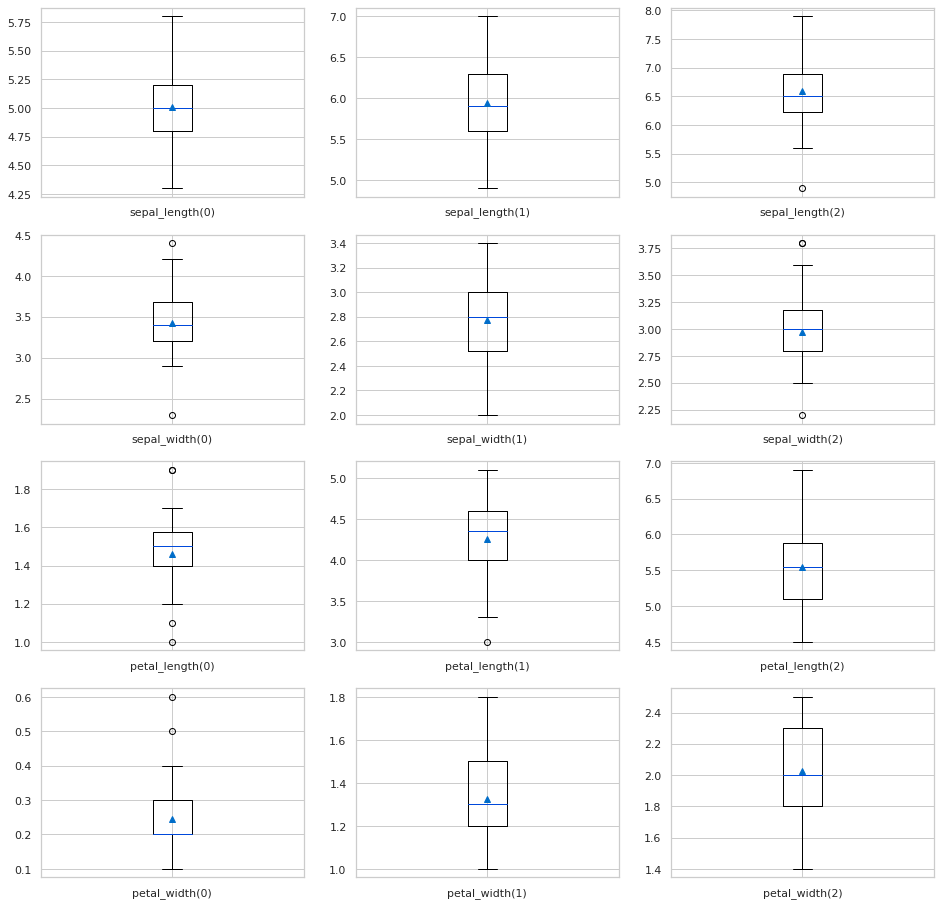

In [17]:
# 特徴量を一つずつ選び、箱ひげ図を使ってラベルごとのデータの分布を可視化する
label = [0, 1, 2]
columns = list(df.columns)
del(columns[-1])

sns.set()
sns.set_style('whitegrid')
sns.set_palette('winter')

plt.figure(figsize=(16, 16))

for i, column in enumerate(columns):
    for j in label:
        plt.subplot(len(columns), len(label), (len(label)*i)+(j+1))
        plt.boxplot(df[df['Species'] == j][columns[i]],
                    labels=[columns[i]+'('+str(j)+')'],
                    showmeans=True)
plt.show()

<function matplotlib.pyplot.show(*args, **kw)>

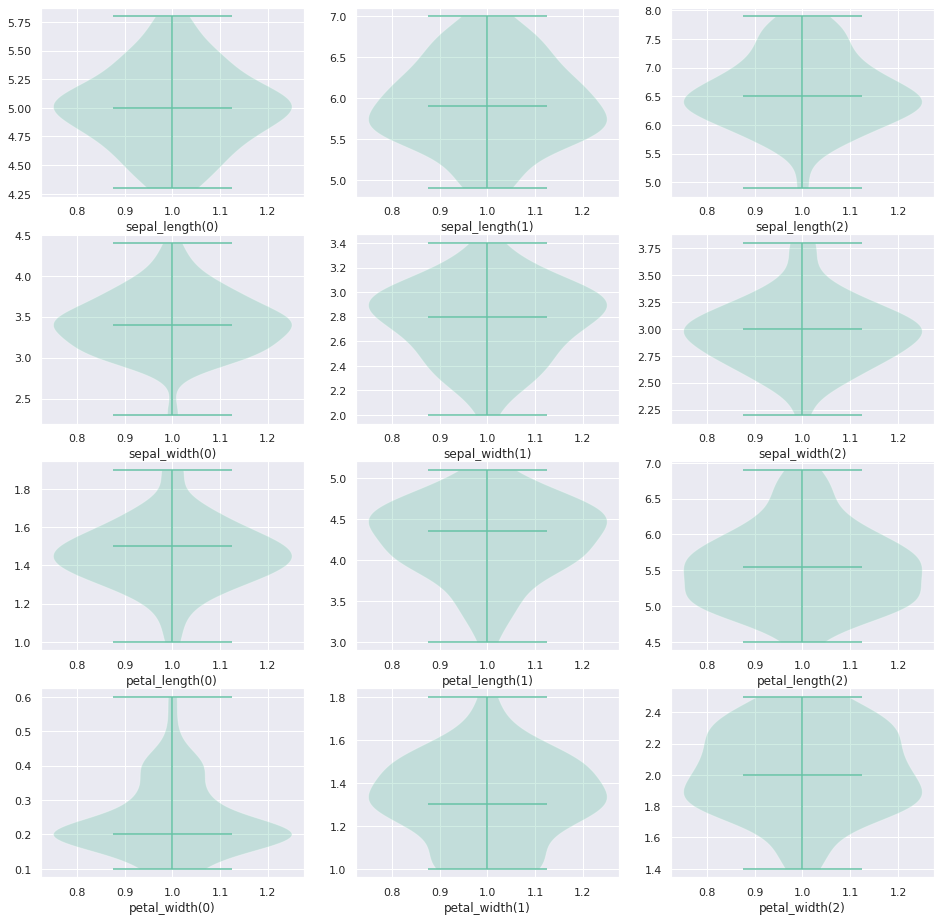

In [18]:
# 特徴量を一つずつ選び、バイオリン図を使ってラベルごとのデータの分布を可視化する
label = [0, 1, 2]
columns = list(df.columns)
del(columns[-1])

sns.set()
sns.set_style('darkgrid')
sns.set_palette('Set2')

plt.figure(figsize=(16, 16))

for i, column in enumerate(columns):
    for j in label:
        plt.subplot(len(columns), len(label), (len(label)*i)+(j+1))
        plt.xlabel(columns[i]+'('+str(j)+')')
        plt.violinplot(df[df['Species'] == j][columns[i]],
                       showmedians=True)
plt.show

#### 箱ひげ図とバイオリン図の違い


##### 箱ひげ図
- 四分位数・平均を正確に見ることができる。
- バイオリン図と比較すると直感的ではない。
- 外れ値を考慮した表示ができる。

##### バイオリン図
- 分布の様子が直感的に理解しやすい。
- カーネル密度推定という手法で描画しているらしく、図に見えている分布は正確な値ではない。
  中央値のみはオプションにより、正しい値が見れるようになる。

### 【問題7】特徴量間の関係の確認
特徴量間の関係を見ていきます。次の4つを行ってください。

- 縦軸と横軸に特徴量を１つずつ取り、種類毎に色分けした散布図を作る
- 全ての組み合わせの散布図を一度に表示させる、散布図行列を作る
- ４つの特徴量に関する相関係数行列を作る
- 相関係数行列のヒートマップを作る

相関係数行列はDataFrameのcorr()メソッドを使うことで求められます。

<function matplotlib.pyplot.show(*args, **kw)>

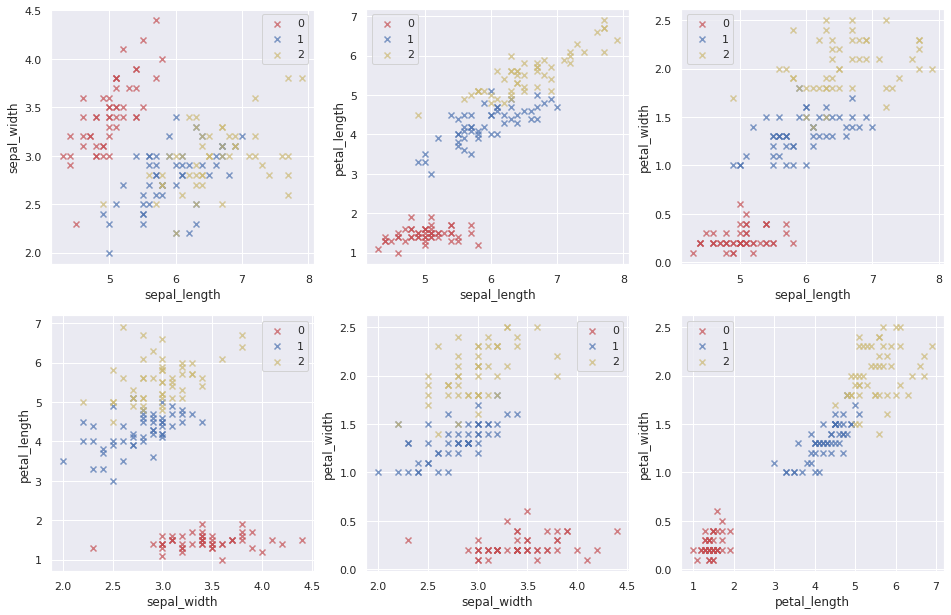

In [19]:
# 縦軸と横軸に特徴量を１つずつ取り、種類毎に色分けした散布図を作る
label = [0, 1, 2]
columns = list(df.columns)
del(columns[-1])

sns.set()
sns.set_style('darkgrid')
sns.set_palette('Blues')

list_color = ['r', 'b', 'y']

plt.figure(figsize=(16, 16))

cnt = 0

for i, column1 in enumerate(columns):
    for column2 in columns[i+1:]:
        plt.subplot(3, 3, cnt+1)
        plt.xlabel(column1)
        plt.ylabel(column2)
        cnt += 1
        
        for j in label: 
            plt.scatter(df[df['Species'] == j][column1],
                        df[df['Species'] == j][column2],
                        marker="x", alpha=0.7,
                        c=list_color[j], label=str(j))
        plt.legend()

plt.show

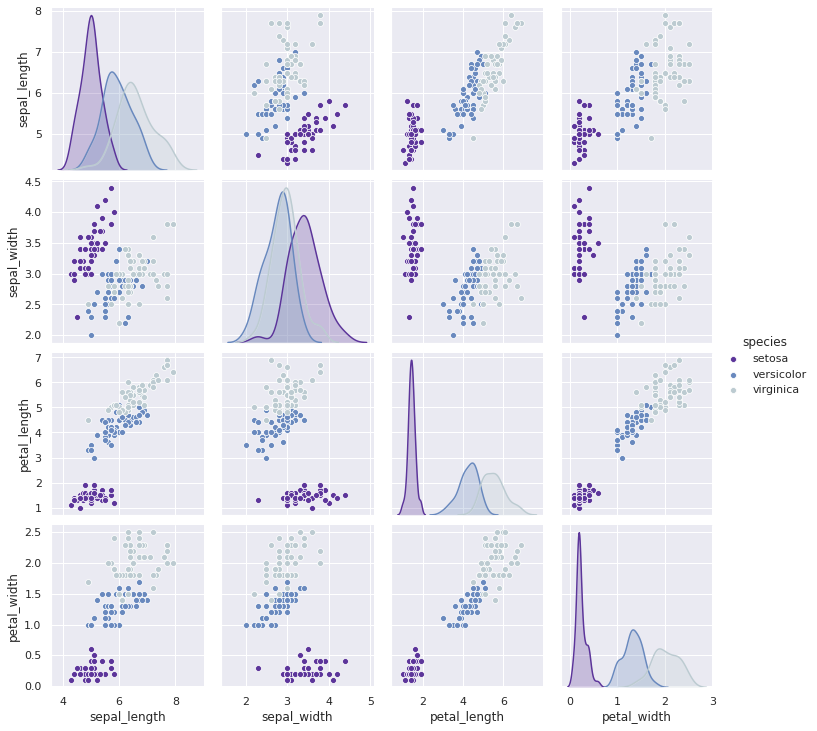

In [20]:
# 全ての組み合わせの散布図を一度に表示させる、散布図行列を作る
iris = sns.load_dataset("iris")
sns.set()
sns.set_style('darkgrid')
sns.set_palette('twilight_shifted')
sns.pairplot(iris, hue="species")
plt.show()

In [21]:
# ４つの特徴量に関する相関係数行列を作る
df_corr = df.iloc[:, :-1].corr()
print(df_corr)

              sepal_length  sepal_width  petal_length  petal_width
sepal_length      1.000000    -0.117570      0.871754     0.817941
sepal_width      -0.117570     1.000000     -0.428440    -0.366126
petal_length      0.871754    -0.428440      1.000000     0.962865
petal_width       0.817941    -0.366126      0.962865     1.000000


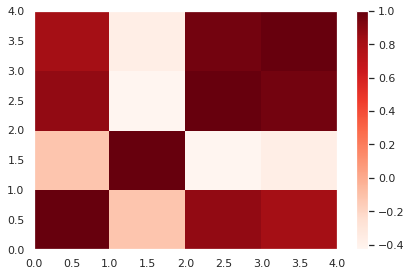

In [22]:
# 相関係数行列のヒートマップを作る
import numpy as np

# グリッドの作成
x = np.arange(0, 5)
y = np.arange(0, 5)
X, Y = np.meshgrid(x, y)

# オブジェクトの生成
fig, ax = plt.subplots()
colormap = ax.pcolor(X, Y, df_corr, cmap="Reds")

#カラーバーの表示
fig.colorbar(colormap, ax=ax)

# 余白の自動調整。パラメータの指定もできる。
fig.tight_layout()


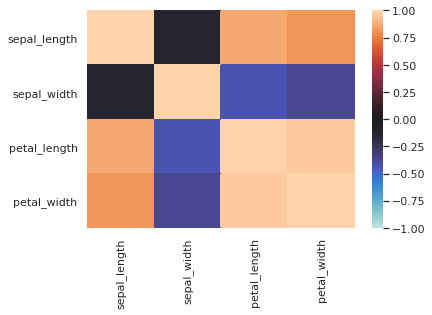

In [23]:
# 相関係数行列のヒートマップを作る(seaborn)
sns.heatmap(df_corr, vmax=1, vmin=-1, center=0)

### 【問題8】可視化したグラフや表の結果の説明
データを探索した時には、結果を述べる（+考察する）ことが大切です。ここまでで作成した表や図から読み取れることや気づきを説明してください。

【散布図(行列)について】
- 特徴量を選択して各ラベルごとに表示することで、アヤメの種類により特徴量に違いが出ることが分かりやすく見える。
- アヤメの例は分かりやすく分類されるように見えた。今後何か分類したいデータがあれば、まずは特徴量を散布図行列にかけてみてみて観察すると良いかもしれない。
- 特徴量の中でも、アヤメの種類によって値にばらつきが出るもの、出ないものがあることが分かる。原因を知りたいならアヤメに詳しくなる必要がありそうだが、データの背景を効果的に理解する足がかりに役立ちそう(いきなりデータの背景をすべて理解しようとするのは非効率だと思う)。


【ヒートマップについて】
- 色の濃さ(値の大きさ)によって、それぞれの特徴量の関連性の有無が理解できる。
- 今回はすべての種類のアヤメに対して作成したが、種類ごとに特徴量の相関係数行列を作成しても良いかもしれない。散布図を見ても、同じ特徴量の組み合わせでも種類によって関連性が強そうなものと弱そうなものがあることが見て取れる。

【箱ひげ図・バイオリン図について(※アヤメの考察になってないです)】
- 値のばらつき具合を見るのに役立つが、散布図行列にあるヒストグラムを見れば事足りる印象。
- 具体的な四分位数を見たいときに箱ひげ図を見れば良い。
- バイオリン図は今後、あまり使わなそう…(上記で書いたとおり大体のばらつきをみるなら散布図行列のヒストグラムで十分だし、大体のばらつき具合だけを図示するケースが少なそう。分析のためというよりは説明資料に使えそうな印象)。

---
それにしても、3種類でこうもキレイに分類されるとは…分かりやすくて学習のために大変助かります。